In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [21]:
eng_dataset = pd.read_csv(r"C:\Users\motieno\Downloads\Data Science\python\Statitistics\Capstone\Crypto_Classifier\data\eng_data\BTCUSDT_features.csv")
eng_dataset.info()
eng_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   int64  
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  ignore              1000 non-null   int64  
 12  return_1d           999 non-null    float64
 13  return_7d           993 non-null    float64
 14  volatility_20d      980 non-null    float64
 15  rsi                 987 non-null    float64
 16  macd   

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd_signal,macd_histogram,sma_20,sma_50,sma_200,bb_upper,bb_lower,bb_width,stoch_k,stoch_d
0,2023-03-05,22346.57,22662.09,22189.22,22430.24,154841.75786,2023-03-05 23:59:59.999,3.473011e+09,4835978,77394.35765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-06,22430.24,22602.19,22258.00,22410.00,203751.82957,2023-03-06 23:59:59.999,4.569102e+09,6471278,102110.26304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-07,22409.41,22557.91,21927.00,22197.96,292519.80912,2023-03-07 23:59:59.999,6.517595e+09,7813394,145498.64219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-08,22198.56,22287.00,21580.00,21705.44,301460.57272,2023-03-08 23:59:59.999,6.641172e+09,8018963,150008.02488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-09,21704.37,21834.99,20042.72,20362.22,443658.28584,2023-03-09 23:59:59.999,9.403029e+09,10076702,217900.59621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset: 1000 days, 26 columns

Feature columns:
['return_1d', 'return_7d', 'volatility_20d', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'sma_20', 'sma_50', 'sma_200', 'bb_width', 'stoch_k', 'stoch_d']


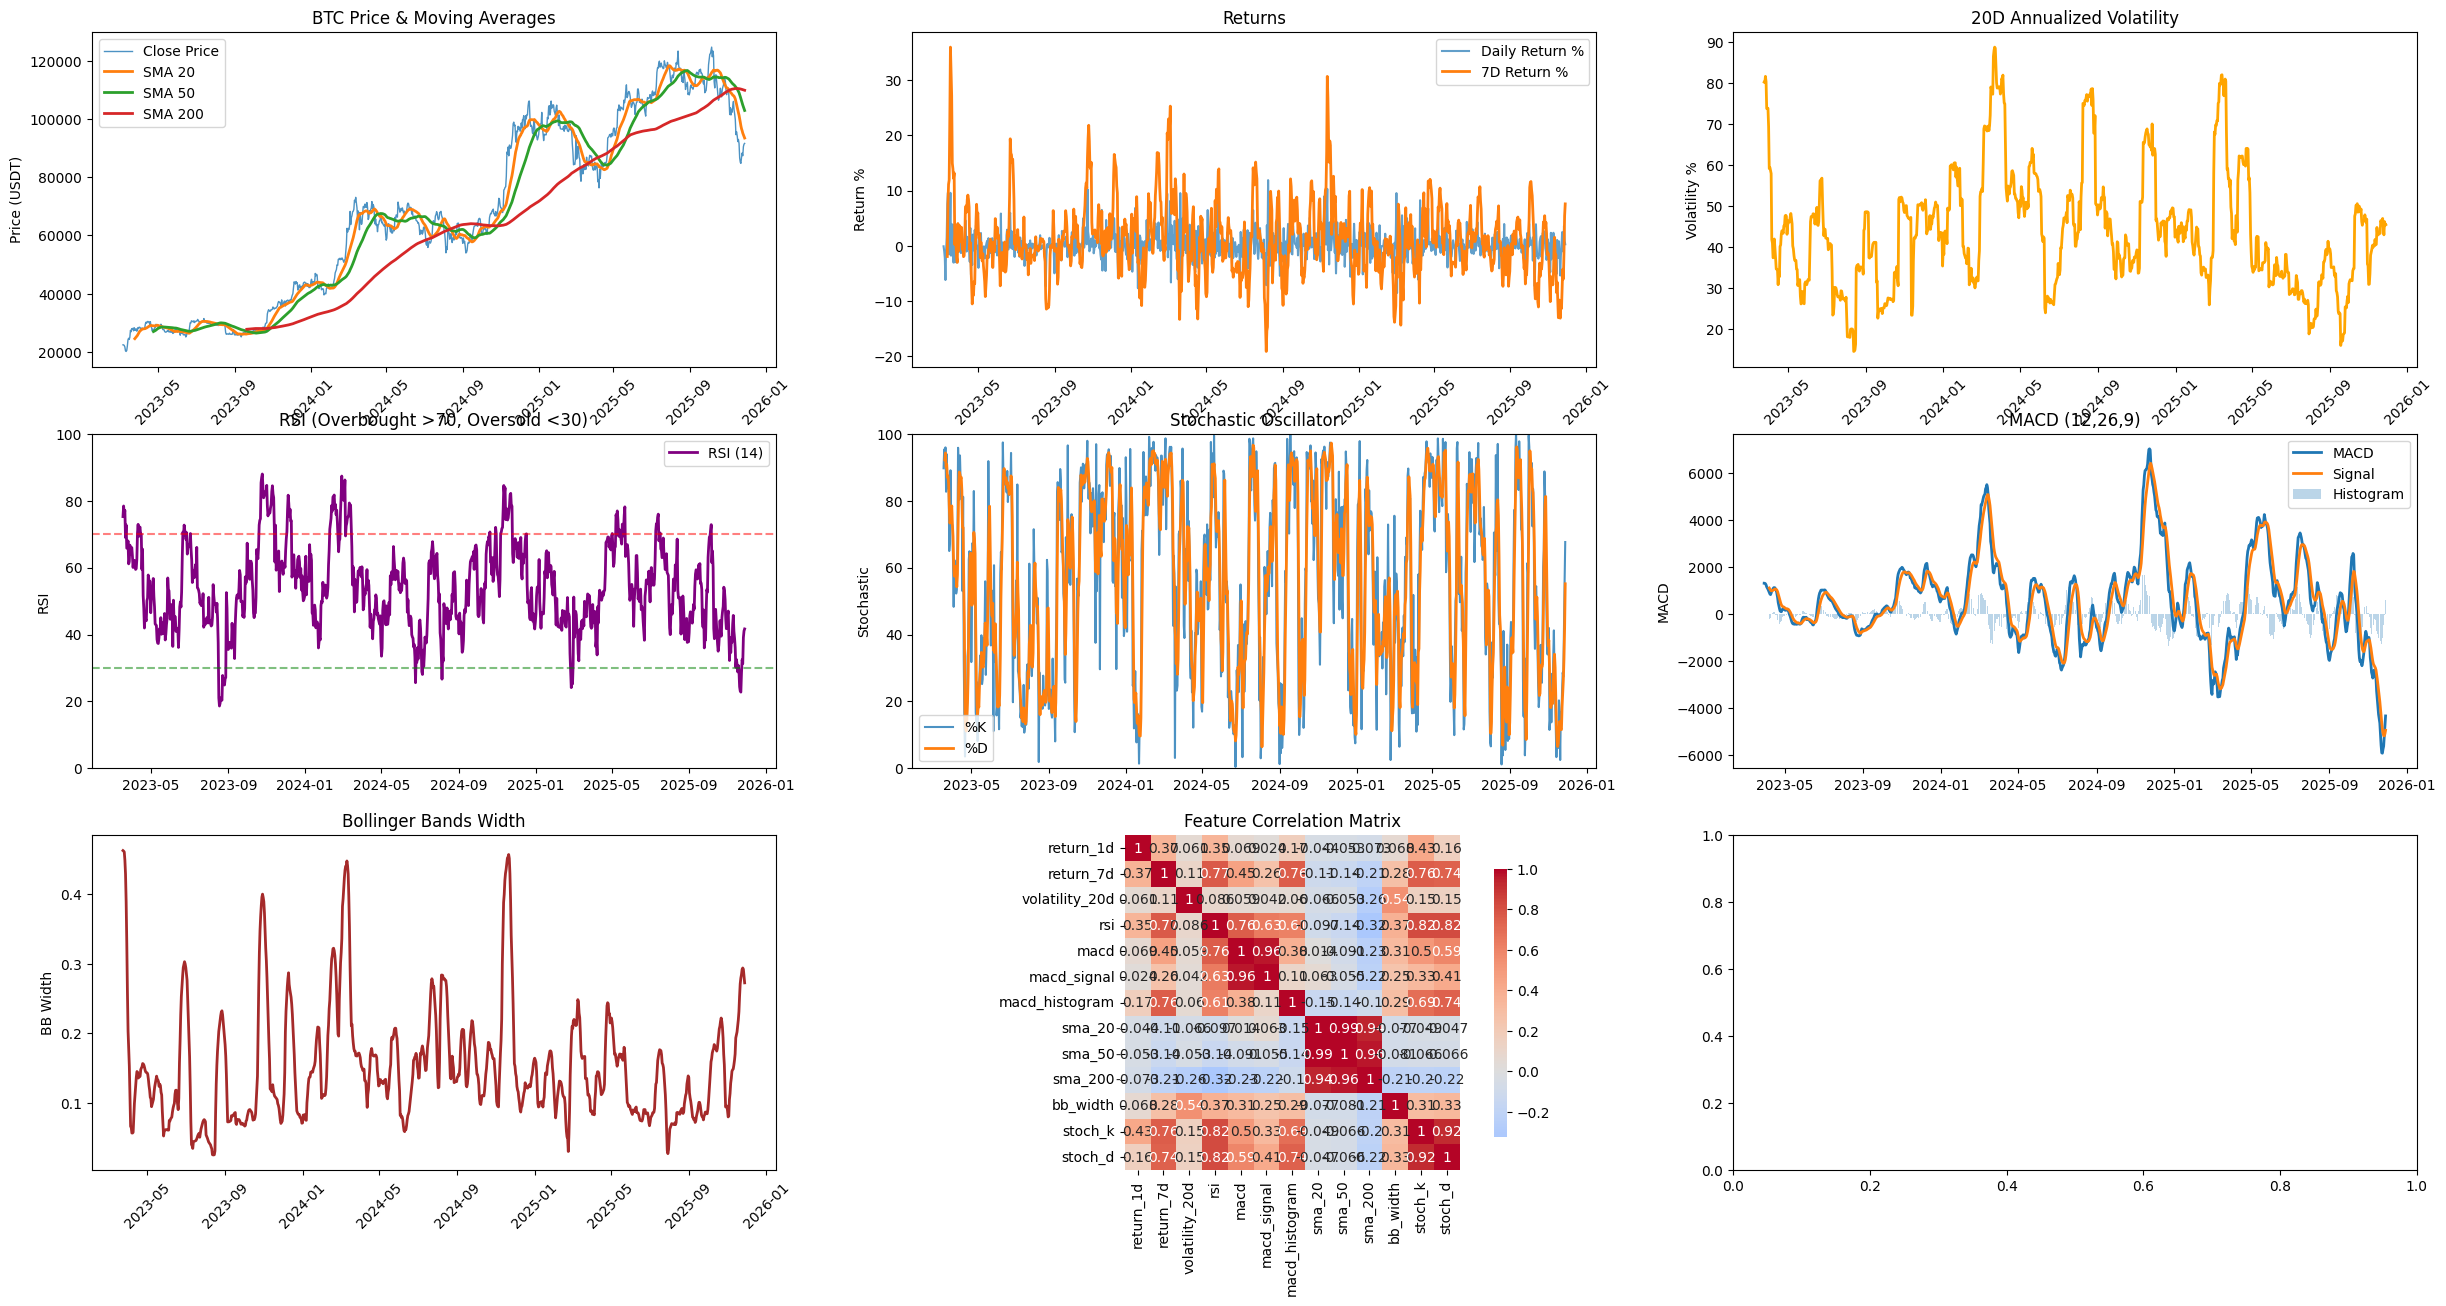

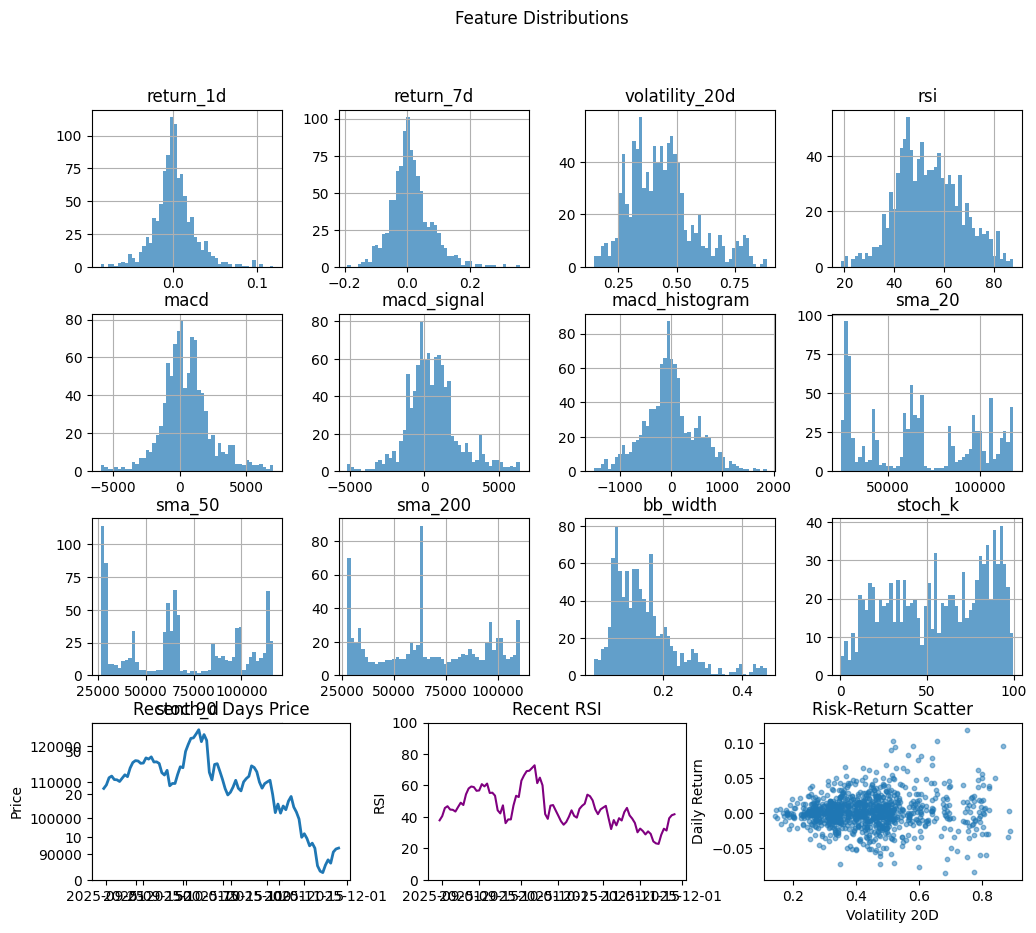


📊 FEATURE STATISTICS (Recent 30 days):
       return_1d  return_7d  volatility_20d      rsi       macd  macd_signal  \
count    30.0000    30.0000         30.0000  30.0000    30.0000      30.0000   
mean     -0.0058    -0.0519          0.4128  35.7385 -3398.2412   -2896.6218   
std       0.0234     0.0502          0.0443   6.8887  1629.6540    1457.7271   
min      -0.0537    -0.1310          0.3089  22.7951 -5907.9646   -5171.1627   
25%      -0.0188    -0.0946          0.3962  30.8243 -4720.2247   -4228.9024   
50%      -0.0073    -0.0587          0.4243  36.9177 -3008.7144   -2464.0297   
75%       0.0115    -0.0160          0.4501  41.0339 -2386.1646   -1686.7356   
max       0.0356     0.0758          0.4699  46.9977  -993.0165   -1089.9210   

       macd_histogram       sma_20       sma_50      sma_200  bb_width  \
count         30.0000      30.0000      30.0000      30.0000   30.0000   
mean        -501.6194  104067.5752  110051.2732  110121.1836    0.1876   
std          492.

In [22]:


# Load features data
# Navigate to your data directory
# os.chdir(r"C:\Users\motieno\Downloads\Data Science\python\Statitistics\Capstone\Crypto_Classifier\data\eng_data")
df = eng_dataset
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)

print(f"Dataset: {len(df)} days, {df.shape[1]} columns")
print("\nFeature columns:")
feature_cols = ['return_1d', 'return_7d', 'volatility_20d', 'rsi', 'macd', 'macd_signal', 
                'macd_histogram', 'sma_20', 'sma_50', 'sma_200', 'bb_width', 'stoch_k', 'stoch_d']
print(feature_cols)

plt.style.use('default')
fig = plt.figure(figsize=(30, 20))
# fig = plt.figure(figsize=(20, 16))

# ========== 1. PRICE & MOVING AVERAGES ==========
plt.subplot(4, 3, 1)
plt.plot(df.index, df['close'], label='Close Price', linewidth=1, alpha=0.8)
plt.plot(df.index, df['sma_20'], label='SMA 20', linewidth=2)
plt.plot(df.index, df['sma_50'], label='SMA 50', linewidth=2)
plt.plot(df.index, df['sma_200'], label='SMA 200', linewidth=2)
plt.title('BTC Price & Moving Averages')
plt.ylabel('Price (USDT)')
plt.legend()
plt.xticks(rotation=45)

# ========== 2. RETURNS & VOLATILITY ==========
plt.subplot(4, 3, 2)
plt.plot(df.index, df['return_1d']*100, label='Daily Return %', alpha=0.7)
plt.plot(df.index, df['return_7d']*100, label='7D Return %', linewidth=2)
plt.title('Returns')
plt.ylabel('Return %')
plt.legend()
plt.xticks(rotation=45)

plt.subplot(4, 3, 3)
plt.plot(df.index, df['volatility_20d']*100, color='orange', linewidth=2)
plt.title('20D Annualized Volatility')
plt.ylabel('Volatility %')
plt.xticks(rotation=45)

# ========== 3. RSI & STOCHASTIC ==========
plt.subplot(4, 3, 4)
plt.plot(df.index, df['rsi'], label='RSI (14)', color='purple', linewidth=2)
plt.axhline(70, color='r', linestyle='--', alpha=0.5)
plt.axhline(30, color='g', linestyle='--', alpha=0.5)
plt.title('RSI (Overbought >70, Oversold <30)')
plt.ylabel('RSI')
plt.ylim(0, 100)
plt.legend()

plt.subplot(4, 3, 5)
plt.plot(df.index, df['stoch_k'], label='%K', alpha=0.8)
plt.plot(df.index, df['stoch_d'], label='%D', linewidth=2)
plt.title('Stochastic Oscillator')
plt.ylabel('Stochastic')
plt.ylim(0, 100)
plt.legend()

# ========== 4. MACD ==========
plt.subplot(4, 3, 6)
plt.plot(df.index, df['macd'], label='MACD', linewidth=2)
plt.plot(df.index, df['macd_signal'], label='Signal', linewidth=2)
plt.bar(df.index, df['macd_histogram'], label='Histogram', alpha=0.3)
plt.title('MACD (12,26,9)')
plt.ylabel('MACD')
plt.legend()

# ========== 5. BOLLINGER BANDS WIDTH ==========
plt.subplot(4, 3, 7)
plt.plot(df.index, df['bb_width'], color='brown', linewidth=2)
plt.title('Bollinger Bands Width')
plt.ylabel('BB Width')
plt.xticks(rotation=45)

# ========== 6. CORRELATION HEATMAP ==========
plt.subplot(4, 3, 8)
corr_matrix = df[feature_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')

# ========== 7. FEATURE DISTRIBUTIONS ==========
plt.subplot(4, 3, 9)
df[feature_cols].hist(bins=50, figsize=(12,10), layout=(4,4), alpha=0.7)
plt.suptitle('Feature Distributions')

# ========== 8. RECENT 90 DAYS OVERVIEW ==========
recent = df.tail(90)
plt.subplot(4, 3, 10)
plt.plot(recent.index, recent['close'], label='Close', linewidth=2)
plt.title('Recent 90 Days Price')
plt.ylabel('Price')

plt.subplot(4, 3, 11)
plt.plot(recent.index, recent['rsi'], label='RSI', color='purple')
plt.title('Recent RSI')
plt.ylabel('RSI')
plt.ylim(0,100)

# ========== 9. RETURN vs VOLATILITY SCATTER ==========
plt.subplot(4, 3, 12)
plt.scatter(df['volatility_20d'], df['return_1d'], alpha=0.5, s=10)
plt.xlabel('Volatility 20D')
plt.ylabel('Daily Return')
plt.title('Risk-Return Scatter')

plt.tight_layout()
plt.show()

# ========== FEATURE STATISTICS ==========
print("\n📊 FEATURE STATISTICS (Recent 30 days):")
recent_stats = df[feature_cols].tail(30).describe()
print(recent_stats.round(4))

print("\n🔥 KEY INSIGHTS:")
print(f"- RSI range: {df['rsi'].min():.1f} → {df['rsi'].max():.1f}")
print(f"- Max daily return: {df['return_1d'].max()*100:.2f}%")
print(f"- Volatility range: {df['volatility_20d'].min()*100:.1f}% → {df['volatility_20d'].max()*100:.1f}%")
print(f"- BB Width avg: {df['bb_width'].mean():.3f}")
